## Zipline Flights

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import glob
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Define necessary functions

In [2]:
#Function to plot histogram of standard error
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()
    print("Mean value of standard error: "+ str(variable_name.mean()))
    print("Minimum value of standard error: "+ str(variable_name.min()))
    print("Maximum value of standard error: "+ str(variable_name.max()))

### Creating dataframe of Summary

In [3]:
#### for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
summary = pd.read_csv('summary_data.csv')

In [4]:
summary.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.550,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453,30.165,2018-09-06 07:43:59 CAT,nan,74.150,80662.082,-49.435,1.949,15SPJJJ11024054
1,16952,20.500,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141,30.535,2018-09-06 07:51:49 CAT,nan,71.175,80708.065,-4.409,0.917,15SPJJJ09011032
2,16954,24.475,15SPJJJ10012034,577209618523054122,5c504d9a16,34.702,29.873,2018-09-06 09:56:37 CAT,nan,66.375,80774.270,-23.459,3.788,15SPJJJ09011032
3,16955,27.300,15SPJJJ10054027,577209618523082792,5c504d9a16,34.369,29.878,2018-09-06 10:27:04 CAT,nan,59.000,80805.139,-46.748,3.922,15SPJJJ11049056
4,16957,26.950,15SPJJJ10050049,577348835962150933,5c504d9a16,32.899,30.027,2018-09-06 11:09:39 CAT,nan,63.900,80768.969,-29.293,2.976,15SPJJJ09031032


In [5]:
summary.shape

(447, 14)

##### Extracting month from launch_timestamp

In [6]:
summary['month'] = summary['launch_timestamp'].apply(lambda x: int(x[5:7]))

In [7]:
summary.groupby('month')['flight_id'].count()

month
9     339
10    108
Name: flight_id, dtype: int64

##### 339 planes were launched in 2018-09 month and 108 planes were launched in 2018-10

### Drop unnecessary columns from summary

In [8]:
summary.drop(["body_serial_number", "battery_serial_number","wing_serial_number","month"], axis = 1, inplace = True) 

### Descriptive summary of all the columns in dataframe

In [9]:
summary.describe()

,flight_id,air_temperature,launch_airspeed,launch_groundspeed,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude
count,447.000,447.000,447.000,447.000,431.000,447.000,447.000,447.000,447.000
mean,17373.454,25.235,31.976,30.112,32.146,56.292,80456.449,-45.295,2.359
std,232.833,4.080,1.760,0.371,0.187,7.278,170.114,63.492,0.996
min,16951.000,16.500,28.027,27.549,31.545,35.500,80010.139,-176.135,0.189
25%,17170.000,22.037,30.761,29.927,32.055,51.200,80323.793,-78.528,1.703
50%,17359.000,24.950,31.893,30.098,32.190,56.200,80445.157,-51.635,2.308
75%,17590.500,28.325,33.199,30.283,32.269,61.350,80590.144,-25.951,3.007
max,17745.000,34.600,36.929,31.205,32.524,74.150,80844.071,179.700,7.466


### Obervations from statistics
1] Launch airspeed has minimum value of 28.027 m/s and maximum value 36.929m/s. 
   There are few values which are 2 standard deviations above and below the mean value, we will          analyse whether they are ouliers or not.
2] Launch groundspeed has minimum value 27.549 and maximum value 31.205.
   Again there are few values which are 2 standard deviations above and below the mean value, we will
   visualize them and try to find out dependencies in next steps

## Interactive visualization of airspeed of each plane during launch 

In [10]:
output_notebook()
TOOLTIPS = [
   ("(y)", "($y)")
]
p = figure(plot_width=700, plot_height=200, tooltips=TOOLTIPS,
           title="Airspeed of the plane during launch")
p.line(summary['flight_id'], summary['launch_airspeed'], color='green', alpha=0.5)
show(p,notebook_handle=True)

Loading BokehJS ...

#### We can see from the visualization there are some outliers. 
#### Airspeed of few planes is above 36 m/s 
#### So it is important to know which planes have airspeed above 36 m/s

In [11]:
results = summary.groupby('flight_id').filter(
    lambda x : x['launch_airspeed'].mean() > 36
    )
results['flight_id']

106    17162
190    17315
339    17595
340    17596
Name: flight_id, dtype: int64

### Interactive visualization of groundspeed of each plane during launch 

In [12]:
p = figure(plot_width=800, plot_height=250)
TOOLTIPS = [
   ("(y)", "($y)")
]
p = figure(plot_width=700, plot_height=200, tooltips=TOOLTIPS,
           title="Groundspeed of the plane during launch")
p.line(summary['flight_id'], summary['launch_groundspeed'], color='navy', alpha=0.5)
show(p)

#### We can see from the visualization there are some outliers. 
#### Groundspeed of few planes is below 28 m/s 
#### So it is important to know which planes have groundspeed below 28 m/s

In [13]:
results = summary.groupby('flight_id').filter(
    lambda x : x['launch_groundspeed'].mean() <=28
    )
results['flight_id']

87    17128
88    17130
Name: flight_id, dtype: int64

## Weather impact on planes

#### We can not say these are outliers till we analyse the correlation of launch_airspeed and
#### Launch_groundspeed with respect to other variables. 
#### Correlation refers to some statistical relationships involving dependence between variables.

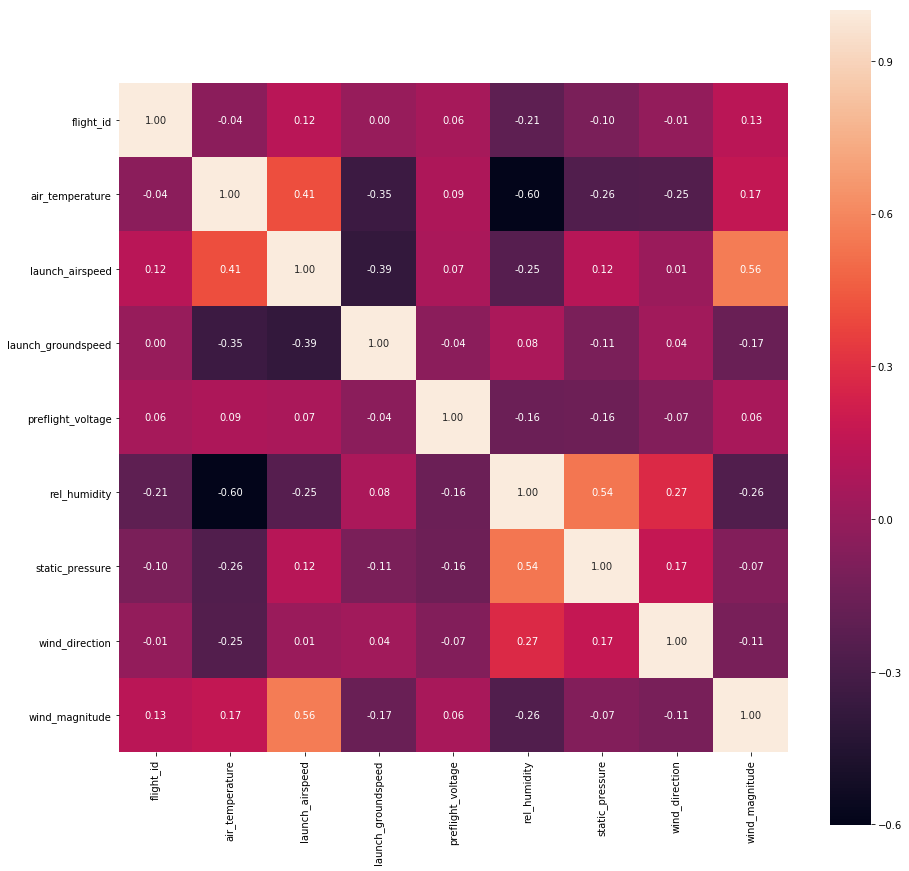

In [14]:
corrmat =summary.corr()
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

###### 1] The correlation coefficient of launch_airspeed w.r.t wind_magnitude is 0.56 
###### that means launch_airspeed increases when the magnitude of wind incrases
###### 2] Launch_airspeed has significant correlation with air_temperature as well(0.41) 
######    and a slightly weak negative relation with rel_humidity(-0.25)
###### 3] launch_groundspeed has a slightly weak negative relation with wind magnitude (-0.17)

#### Visualizing relationship between launch_airspeed and wind_magnitude

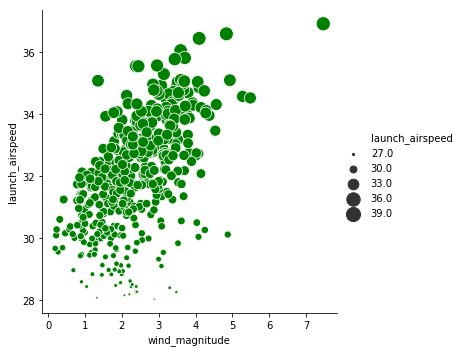

In [16]:
sns.relplot(x="wind_magnitude", y="launch_airspeed", size="launch_airspeed", sizes=(5, 200),color="g" ,data=summary);

#### It can be seen clearly launch_airspeed increases when wind_magnitude is increased.
#### So the previous ouliers in launch_airspeed corresponds to wind_magnitude

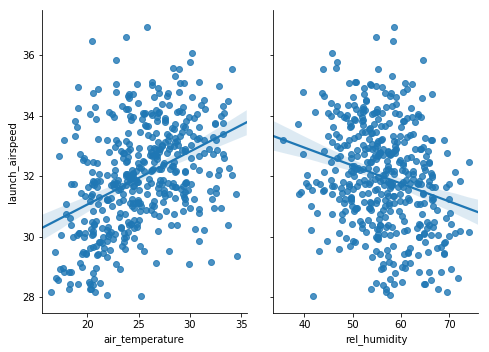

In [17]:
sns.pairplot(summary, x_vars=['air_temperature','rel_humidity'], y_vars='launch_airspeed', size=5, aspect=0.7, kind='reg')

#### It is clear from above visulization that launch_airspeed incrases slightly with air_temperature 
#### and decrases slightly with rel_humidity

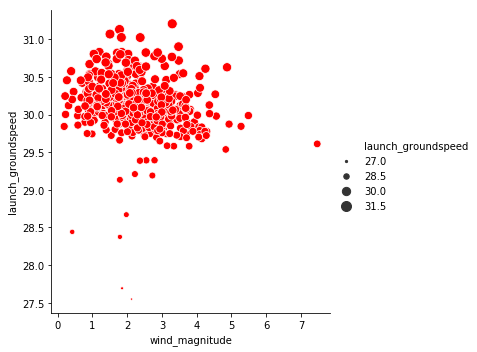

In [18]:
sns.relplot(x="wind_magnitude", y="launch_groundspeed", size="launch_groundspeed", sizes=(5, 100),color="r" ,data=summary);

#### It is clear from above visuliztion that ground speed of plane has a very weak negative
#### relation with wind magnitude

## Big frame having 30 columns in Summary

#### I thought that I should add more columns to summary data for each plane in order to analyze
#### plane performance more effectively
#### I took mean of each column for each flight.csv and combined them in a separate dataframe

In [19]:
all_files = glob.glob(r'C:\Users\SayaliGirish\Desktop\TakeHome\data_scientist_take-home\flight_*.csv')
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    new_df = pd.DataFrame(df.mean(axis=0).to_dict(),index=[df.index.values[-1]])
    li.append(new_df)
frame = pd.concat(li, axis=0, ignore_index=True)   

#### New dataframe has column names similar to flight_.csv and row values are 
#### mean of each column in each flight_.csv

In [20]:
frame.head()

,seconds_since_launch,position_ned_m[0],position_ned_m[1],position_ned_m[2],velocity_ned_mps[0],velocity_ned_mps[1],velocity_ned_mps[2],accel_body_mps2[0],accel_body_mps2[1],accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
0,4.998,-149.990,72.507,-33.277,-19.823,8.419,-3.524,3.429,0.245,-9.421,-0.047,0.205,2.711,-0.015,-0.006,-0.008,0.890,1.433,1.593
1,4.998,-152.736,74.207,-33.013,-20.290,8.378,-3.510,3.553,0.321,-9.345,-0.051,0.218,2.758,-0.020,-0.004,-0.006,1.030,1.505,1.718
2,4.999,-148.326,71.620,-33.078,-19.451,7.981,-3.495,3.159,0.328,-9.550,-0.044,0.188,2.760,-0.013,-0.001,-0.004,1.069,1.637,1.786
3,4.999,-144.587,69.033,-32.099,-19.014,7.683,-3.539,3.323,0.150,-9.629,-0.021,0.201,2.700,-0.011,0.003,-0.007,0.868,1.449,1.378
4,4.999,-145.775,71.035,-32.593,-19.431,8.044,-3.371,3.331,0.263,-9.465,-0.038,0.199,2.748,-0.013,-0.001,-0.006,0.789,1.064,1.423


##### validation(for reference) first row of new frame is equal to mean of columns in first flight_16952.csv

In [23]:
tempFile=pd.read_csv(r'C:\Users\SayaliGirish\Desktop\TakeHome\data_scientist_take-home\flight_16952.csv')
tempFile.mean(axis=0)

seconds_since_launch            4.998
position_ned_m[0]            -152.736
position_ned_m[1]              74.207
position_ned_m[2]             -33.013
velocity_ned_mps[0]           -20.290
velocity_ned_mps[1]             8.378
velocity_ned_mps[2]            -3.510
accel_body_mps2[0]              3.553
accel_body_mps2[1]              0.321
accel_body_mps2[2]             -9.345
orientation_rad[0]             -0.051
orientation_rad[1]              0.218
orientation_rad[2]              2.758
angular_rate_body_radps[0]     -0.020
angular_rate_body_radps[1]     -0.004
angular_rate_body_radps[2]     -0.006
position_sigma_ned_m[0]         1.030
position_sigma_ned_m[1]         1.505
position_sigma_ned_m[2]         1.718
dtype: float64

#### Combining new dataframe with Summary dataframe 

In [24]:
big_frame=pd.concat([summary, frame], axis=1)

In [25]:
big_frame.head()

,flight_id,air_temperature,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,...,accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
0,16951,20.550,5c504d9a16,32.453,30.165,2018-09-06 07:43:59 CAT,nan,74.150,80662.082,-49.435,...,-9.421,-0.047,0.205,2.711,-0.015,-0.006,-0.008,0.890,1.433,1.593
1,16952,20.500,5c504d9a16,32.141,30.535,2018-09-06 07:51:49 CAT,nan,71.175,80708.065,-4.409,...,-9.345,-0.051,0.218,2.758,-0.020,-0.004,-0.006,1.030,1.505,1.718
2,16954,24.475,5c504d9a16,34.702,29.873,2018-09-06 09:56:37 CAT,nan,66.375,80774.270,-23.459,...,-9.550,-0.044,0.188,2.760,-0.013,-0.001,-0.004,1.069,1.637,1.786
3,16955,27.300,5c504d9a16,34.369,29.878,2018-09-06 10:27:04 CAT,nan,59.000,80805.139,-46.748,...,-9.629,-0.021,0.201,2.700,-0.011,0.003,-0.007,0.868,1.449,1.378
4,16957,26.950,5c504d9a16,32.899,30.027,2018-09-06 11:09:39 CAT,nan,63.900,80768.969,-29.293,...,-9.465,-0.038,0.199,2.748,-0.013,-0.001,-0.006,0.789,1.064,1.423


#### Visualizing the standard errors i.e positional uncertainty of plane in 
#### North, East, Down directions by plotting histogram and box plot
#### Position error is one of the errors affecting the systems in an aircraft for measuring airspeed and altitude.

### 1] Postional uncertainty in North direction

Mean value of standard error: 1.0993489655272086
Minimum value of standard error: 0.6183978532633356
Maximum value of standard error: 3.1918418366164634


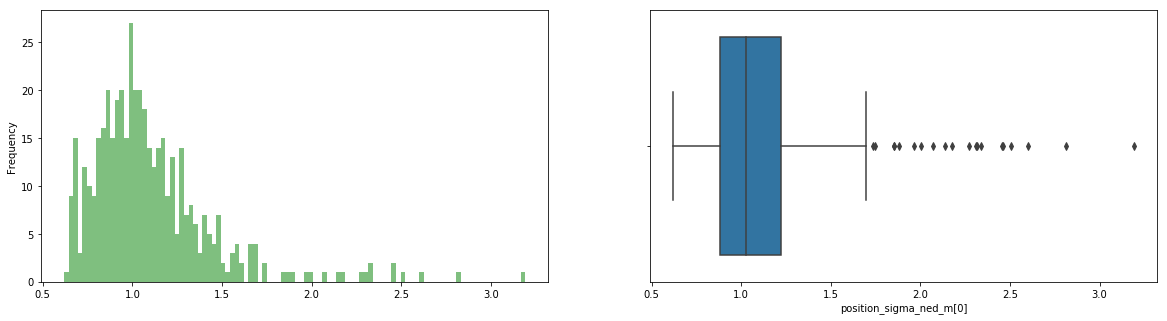

In [26]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
DrawHistogram(big_frame['position_sigma_ned_m[0]'])
plt.subplot(1, 2, 2)
sns.boxplot(x= big_frame['position_sigma_ned_m[0]'])

#### There are few flights which have high positional uncertainty in North direction which
#### might need correction

In [27]:
results = big_frame.groupby('flight_id').filter(
    lambda x : x['position_sigma_ned_m[0]'].mean() >2
    )
results['flight_id']

16     16987
33     17025
37     17030
121    17181
160    17262
222    17358
223    17359
245    17418
255    17441
265    17462
332    17587
337    17593
381    17653
435    17726
Name: flight_id, dtype: int64

### 2] Postional uncertainty in East direction

Mean value of standard error: 1.5306217495660335
Minimum value of standard error: 0.956577985808692
Maximum value of standard error: 4.9756704174397575


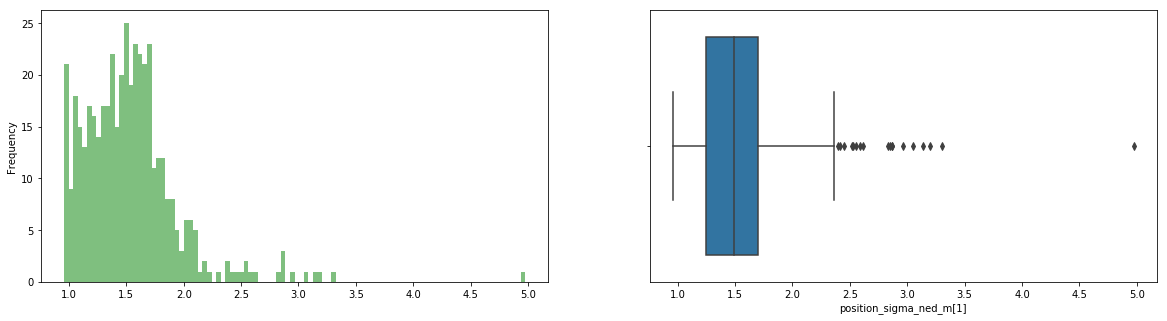

In [28]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
DrawHistogram(big_frame['position_sigma_ned_m[1]'])
plt.subplot(1, 2, 2)
sns.boxplot(x= big_frame['position_sigma_ned_m[1]'])

#### There are few flights which have high positional uncertainty in North direction which
#### might need correction

In [29]:
results = big_frame.groupby('flight_id').filter(
    lambda x : x['position_sigma_ned_m[1]'].mean() >2.5
    )
results['flight_id']

16     16987
33     17025
37     17030
115    17175
160    17262
222    17358
223    17359
245    17418
255    17441
265    17462
332    17587
341    17597
381    17653
399    17676
417    17699
Name: flight_id, dtype: int64

### 3] Postional uncertainty in down direction

Mean value of standard error: 1.7115798526978017
Minimum value of standard error: 1.1525089112241758
Maximum value of standard error: 3.8133045060939086


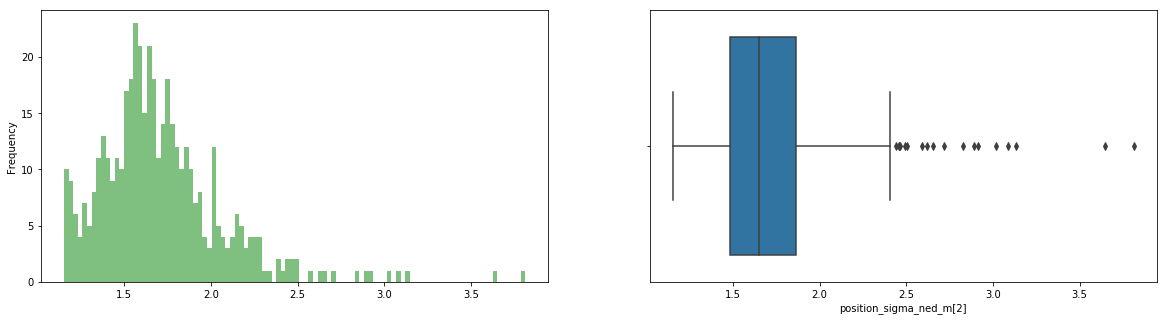

In [30]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
DrawHistogram(big_frame['position_sigma_ned_m[2]'])
plt.subplot(1, 2, 2)
sns.boxplot(x= big_frame['position_sigma_ned_m[2]'])

#### There are few flights which have high positional uncertainty in North direction which
#### might need correction

In [31]:
results = big_frame.groupby('flight_id').filter(
    lambda x : x['position_sigma_ned_m[2]'].mean() >2.5
    )
results['flight_id']

37     17030
160    17262
222    17358
223    17359
245    17418
255    17441
265    17462
332    17587
334    17590
381    17653
417    17699
419    17702
435    17726
Name: flight_id, dtype: int64